<a href="https://colab.research.google.com/github/DGkurnia/cnkproject/blob/main/BMLP_Derfansyah_Guswiranata_Kurnia_c.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Perkenalan Diri
# Nama : Derfansyah Guswiranata Kurnia
# Identitas dicoding : dgkurnia

# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

In [1]:
#Tahap awal inisiasi
!pip install kaggle #instal Kaggle

In [2]:
#instalasi 'json'
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"derfansyahgk","key":"24be196f622b75f71753aee422847c5c"}'}

In [3]:
#kode untuk kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# **2. Import Perpustakaan (Library)**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [4]:
#Perpustakaan dataset
import numpy as np
import pandas as pd
#Grafik
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#Lanjutan instalasi perpustakaan untuk tahap data preprocessing
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

# Import libraries for model evaluation
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_curve,
    auc,
    RocCurveDisplay,
)

In [6]:
#Lanjutan perpustakaan untuk inisiasi tahap 'machine learning'
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Suppress warnings (use with caution)
import warnings
warnings.filterwarnings("ignore")

# **3. Proses Pemuatan Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [8]:
#pengunduhan dataset
!kaggle datasets download -d bhavikjikadara/mental-health-dataset

Dataset URL: https://www.kaggle.com/datasets/bhavikjikadara/mental-health-dataset
License(s): Attribution 4.0 International (CC BY 4.0)
  0% 0.00/1.95M [00:00<?, ?B/s]
100% 1.95M/1.95M [00:00<00:00, 150MB/s]


In [9]:
#ekstraksi
!unzip mental-health-dataset.zip

Archive:  mental-health-dataset.zip
  inflating: Mental Health Dataset.csv  


In [ ]:
#Pembacaan dataset
mentaldf = pd.read_csv("/content/Mental Health Dataset.csv")
#Penyalinan demi keamanan
mtdfc =  mentaldf.copy()
#Inspeksi mtdfc
mtdfc.head(30)

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

## Info tentang data

In [11]:
#Tahap awal pemeriksaan
mtdfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292364 entries, 0 to 292363
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Timestamp                292364 non-null  object
 1   Gender                   292364 non-null  object
 2   Country                  292364 non-null  object
 3   Occupation               292364 non-null  object
 4   self_employed            287162 non-null  object
 5   family_history           292364 non-null  object
 6   treatment                292364 non-null  object
 7   Days_Indoors             292364 non-null  object
 8   Growing_Stress           292364 non-null  object
 9   Changes_Habits           292364 non-null  object
 10  Mental_Health_History    292364 non-null  object
 11  Mood_Swings              292364 non-null  object
 12  Coping_Struggles         292364 non-null  object
 13  Work_Interest            292364 non-null  object
 14  Social_Weakness     

In [ ]:
#deskripsi data
mtdfc.describe()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang perlu dilakukan, namun **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

In [13]:
#Insoeksi nilai hilang
print('Persentase Nilai Hilang')
(mtdfc.isna().mean() * 100).round(1)

Persentase Nilai Hilang


,0
Timestamp,0.0
Gender,0.0
Country,0.0
Occupation,0.0
self_employed,1.8
family_history,0.0
treatment,0.0
Days_Indoors,0.0
Growing_Stress,0.0
Changes_Habits,0.0


### Nilai hilang yang kecil (<2%) memudahkan proses penghapusan data

In [14]:
#Inspeksi nilai duplikat (angka & persentase)
# Niai angka duplikat
print('Total Duplikat: {:,}'.format(mtdfc.duplicated().sum()))

# Nilai persentasi duplikat
print('Percentage of duplicates: {:.1%}'.format(mtdfc.duplicated().mean()))

Total Duplikat: 2,313
Percentage of duplicates: 0.8%


In [15]:
#Pembersihan tahap awal (penghapusan)
mtdfc.dropna(inplace=True)

In [16]:
#Tahap pembersihan duplikat
mtdfc.drop_duplicates(inplace = True)
#Pemeriksaan data setelah penghapusan duplikat
print('Amount of duplicates: {:,}'.format(mtdfc.duplicated().sum()))

Amount of duplicates: 0


In [18]:
#inspeksi pencilan
mtdfc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 284858 entries, 3 to 292363
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Timestamp                284858 non-null  object
 1   Gender                   284858 non-null  object
 2   Country                  284858 non-null  object
 3   Occupation               284858 non-null  object
 4   self_employed            284858 non-null  object
 5   family_history           284858 non-null  object
 6   treatment                284858 non-null  object
 7   Days_Indoors             284858 non-null  object
 8   Growing_Stress           284858 non-null  object
 9   Changes_Habits           284858 non-null  object
 10  Mental_Health_History    284858 non-null  object
 11  Mood_Swings              284858 non-null  object
 12  Coping_Struggles         284858 non-null  object
 13  Work_Interest            284858 non-null  object
 14  Social_Weakness          

## **5b. Inspeksi awal data**

 ### Persentase Argumentasi untuk inspeksi.

 ### Argumen:
      category (str): Kelompok Kategori.

 ### Kumpulan Hasil:
      pandas.DataFrame: Format 'dataframe' untuk inspeksi hasil.


In [29]:
#Persiapan untuk fungsi
def countsplot(category):
  # Create count plot with dynamic title
  plt.figure(figsize = (10, 9))
  sns.countplot(data = mtdfc, x = category)
  plt.ylabel("Count")
  plt.title(f"{category} Distribution")
  plt.show()

  # Calculate counts and percentages
  category_counts = mtdfc[category].value_counts() #Nilai perhitungan
  category_percentages = mtdfc[category].value_counts(normalize = True) #Persentase

  # Combine counts and percentages into a DataFrame
  stats_df = pd.DataFrame({"Count": category_counts, "Proportion": category_percentages})
  stats_df["Count"] = stats_df["Count"].apply("{:,}".format)
  stats_df["Proportion"] = stats_df["Proportion"].apply("{:.1%}".format)

  return stats_df

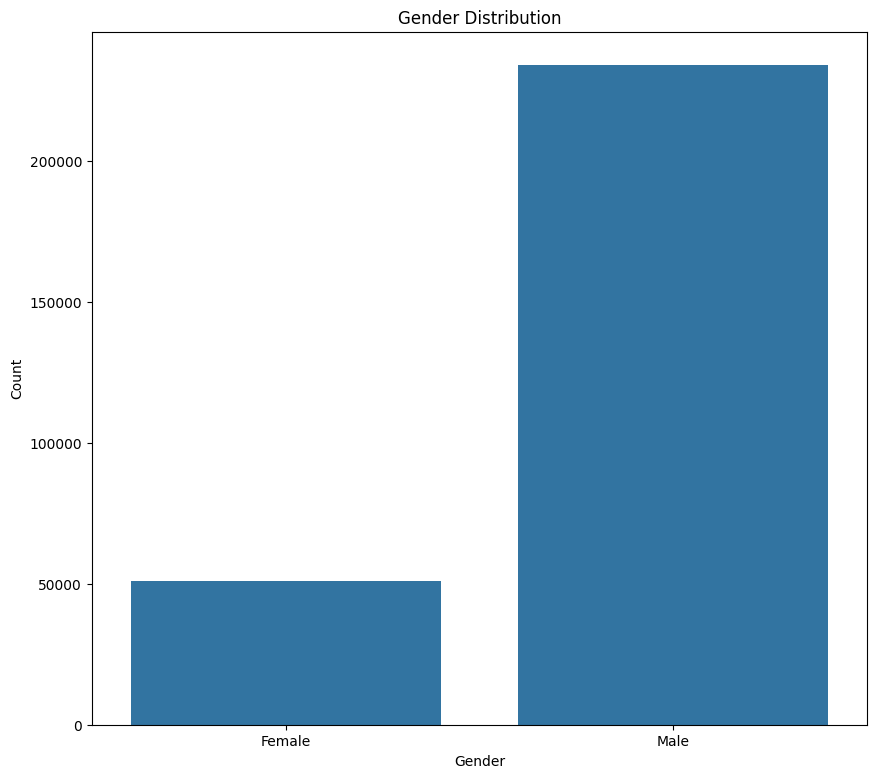

,Count,Proportion
Gender,,
Male,"234,000",82.1%
Female,"50,858",17.9%


In [30]:
#Hasil inspeksi (Jenis Kelamin)
countsplot("Gender")

#### Pria (82,1%) lebih dominan dari wanita

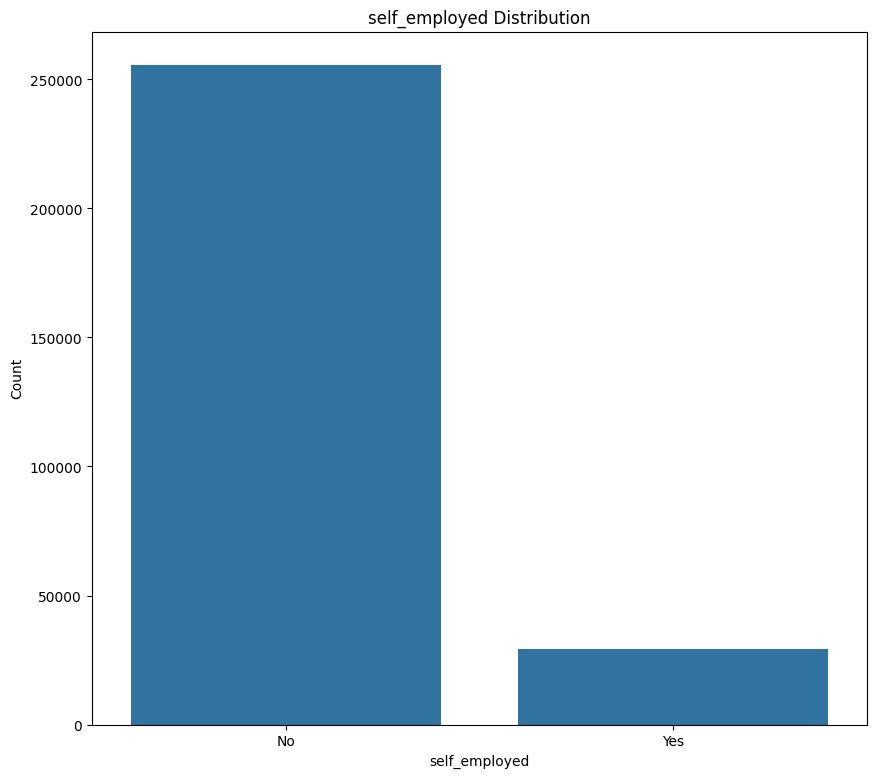

,Count,Proportion
self_employed,,
No,"255,711",89.8%
Yes,"29,147",10.2%


In [31]:
#Lanjutan (kecendrungan stres dari pekerja mandiri)
countsplot("self_employed")

#### Pekerja Mandiri lebih disukai

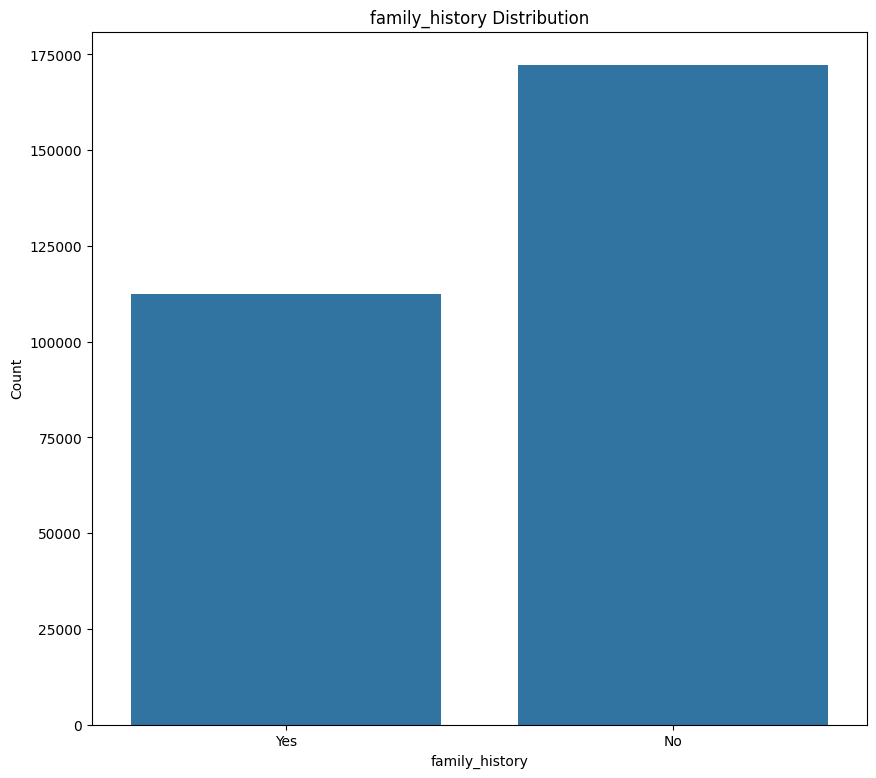

,Count,Proportion
family_history,,
No,"172,357",60.5%
Yes,"112,501",39.5%


In [32]:
#Lanjutan (sejarah keluarga)
countsplot("family_history")

#### Sebagian penderita tidak memiliki catatan sejarah riwayat

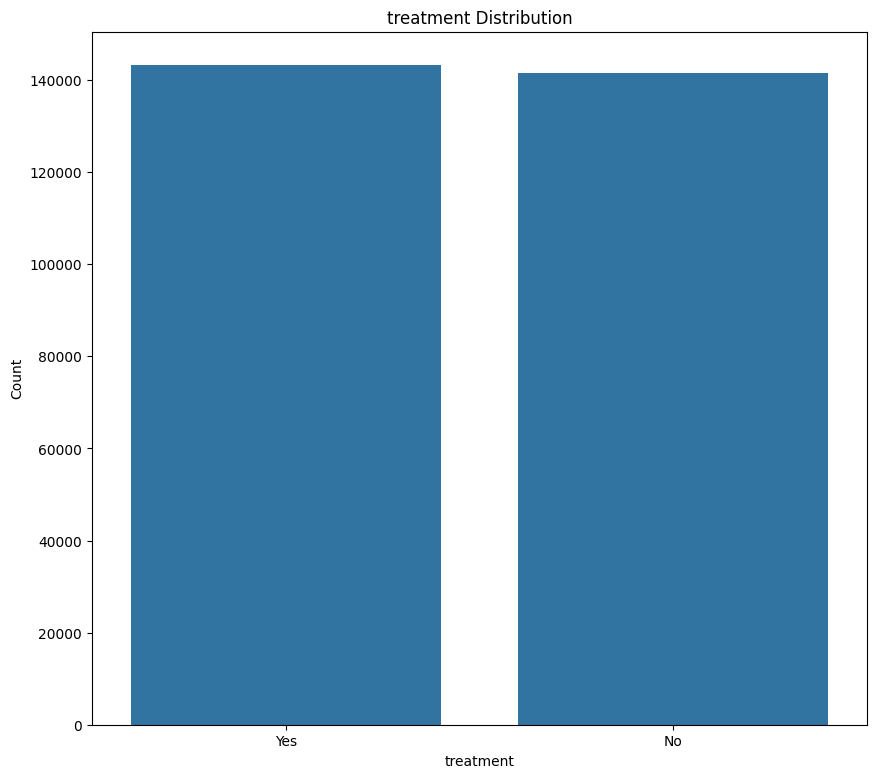

,Count,Proportion
treatment,,
Yes,"143,331",50.3%
No,"141,527",49.7%


In [33]:
#ada perawatan atau tidak
countsplot("treatment")

#### Rasio antara pernah ada pengobatan dan tidak hampir sama

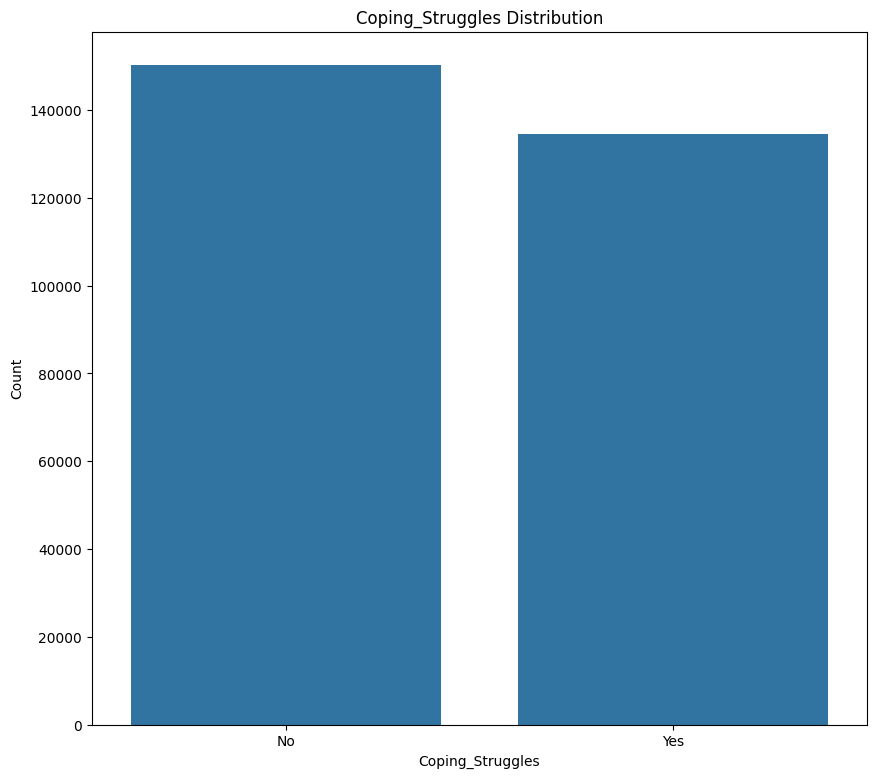

,Count,Proportion
Coping_Struggles,,
No,"150,318",52.8%
Yes,"134,540",47.2%


In [45]:
#kecendrungan untuk mengalami kesusahan untuk perjuangan
countsplot("Coping_Struggles")

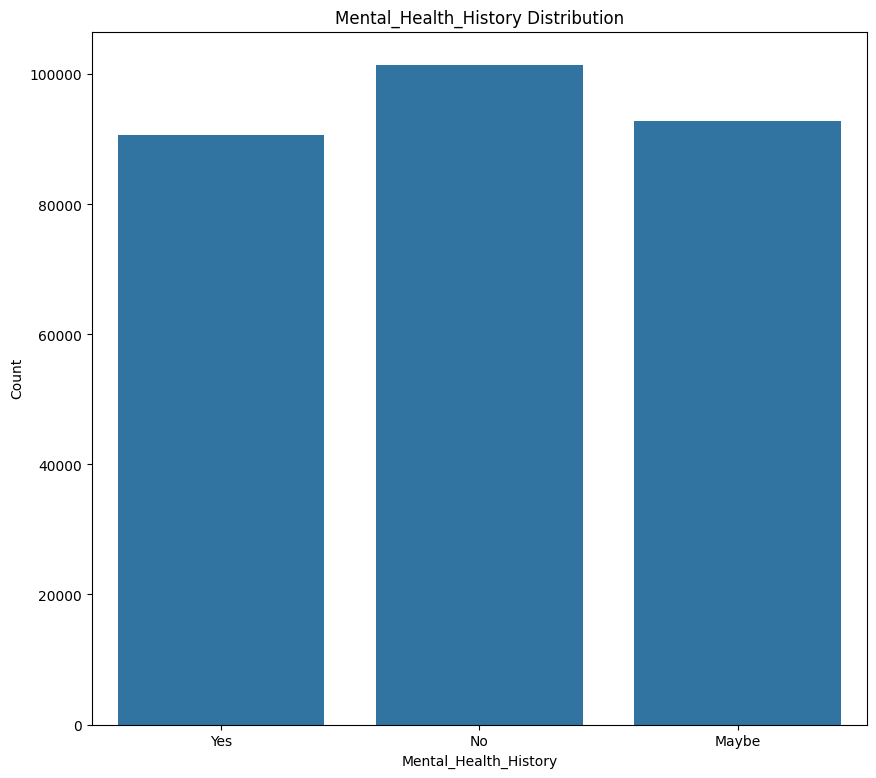

,Count,Proportion
Mental_Health_History,,
No,"101,474",35.6%
Maybe,"92,808",32.6%
Yes,"90,576",31.8%


In [41]:
#Inspeksi riwayat sebelumnya
countsplot("Mental_Health_History")

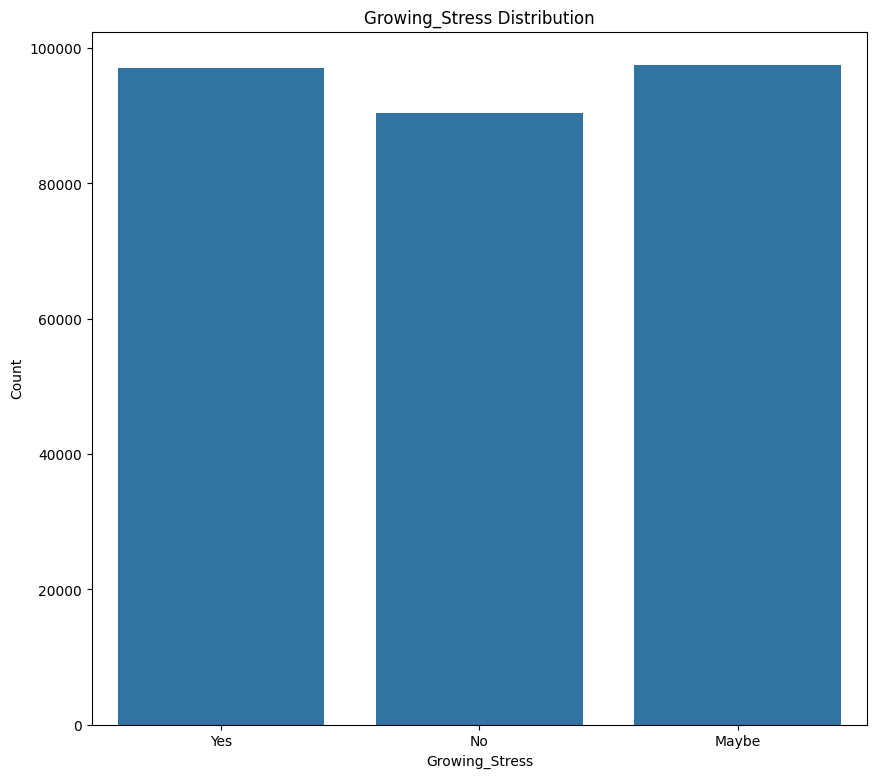

,Count,Proportion
Growing_Stress,,
Maybe,"97,540",34.2%
Yes,"96,978",34.0%
No,"90,340",31.7%


In [34]:
#kecendrungan untuk stres
countsplot("Growing_Stress")

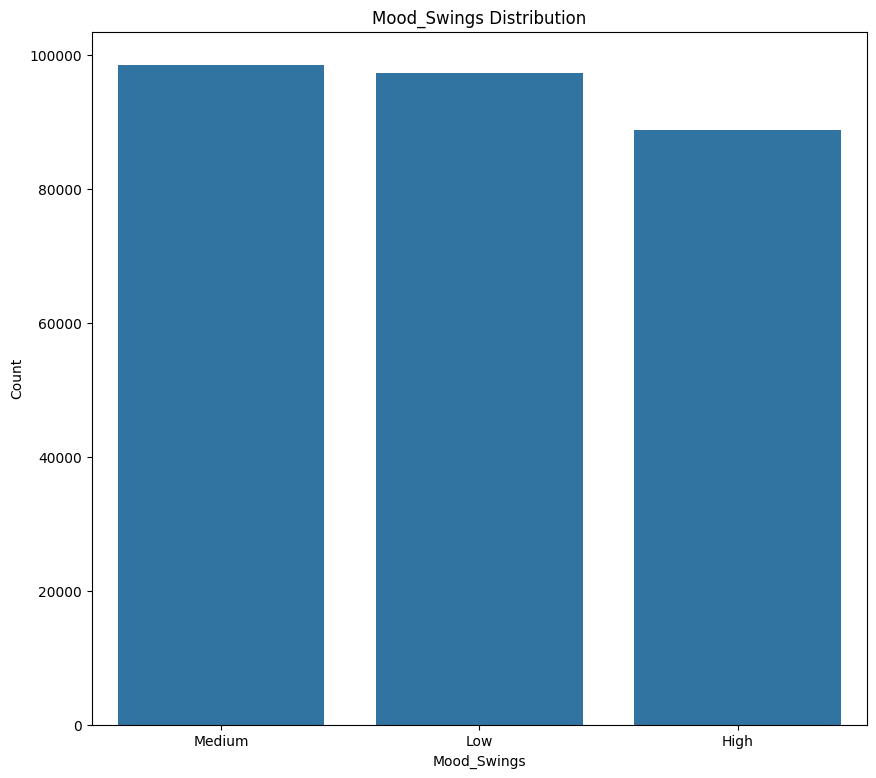

,Count,Proportion
Mood_Swings,,
Medium,"98,592",34.6%
Low,"97,392",34.2%
High,"88,874",31.2%


In [35]:
#kecendrungan untuk mengalami 'pengubahan mood'
countsplot("Mood_Swings")

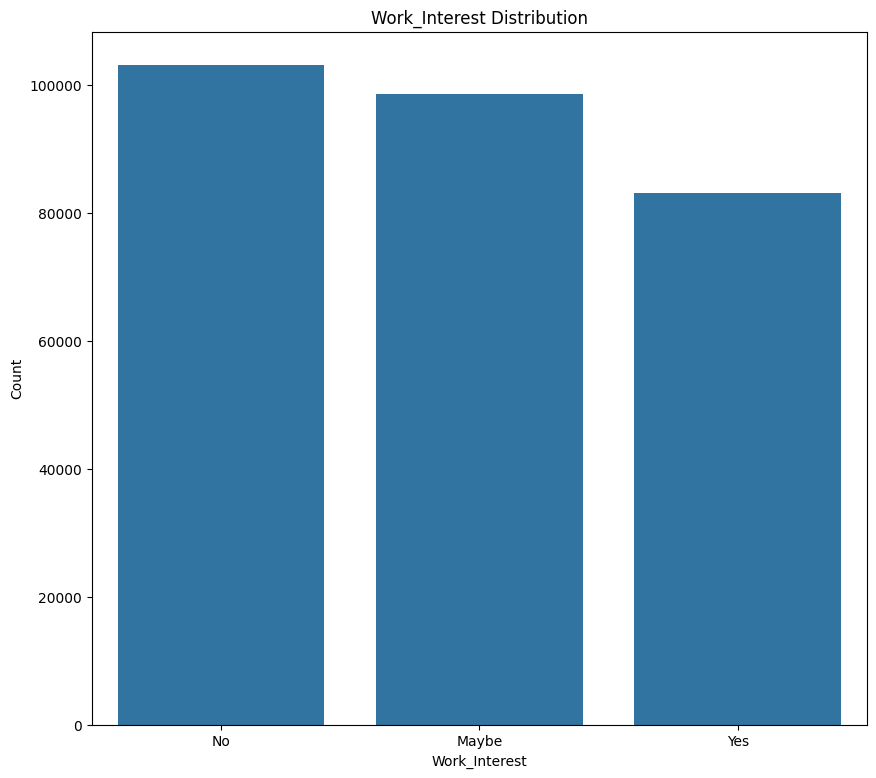

,Count,Proportion
Work_Interest,,
No,"103,136",36.2%
Maybe,"98,592",34.6%
Yes,"83,130",29.2%


In [36]:
#ketertarikan seseorang dalam kerja
countsplot("Work_Interest")

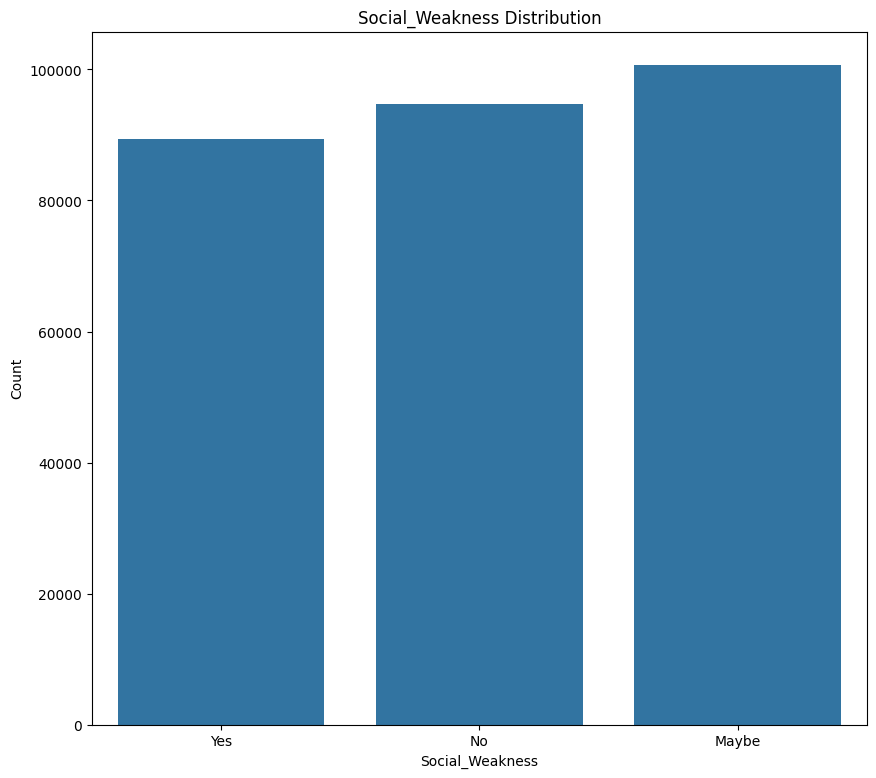

,Count,Proportion
Social_Weakness,,
Maybe,"100,746",35.4%
No,"94,746",33.3%
Yes,"89,366",31.4%


In [43]:
#kecendrungan untuk kelemahan sosial
countsplot("Social_Weakness")

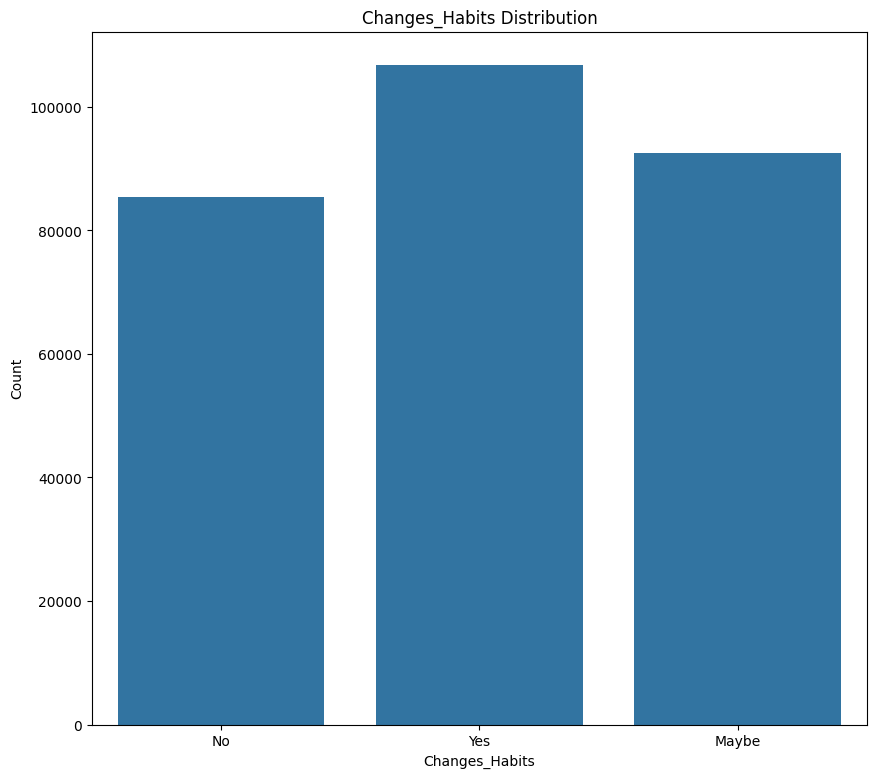

,Count,Proportion
Changes_Habits,,
Yes,"106,844",37.5%
Maybe,"92,602",32.5%
No,"85,412",30.0%


In [44]:
#Kecendrungan untuk pengubahan kebiasaan akibat sosial
countsplot("Changes_Habits")

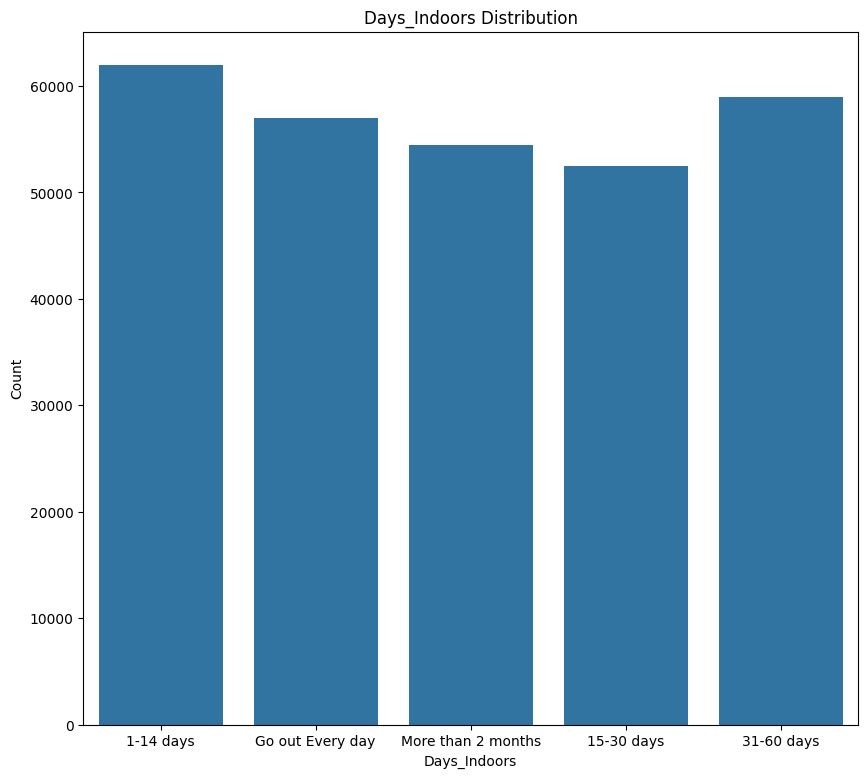

,Count,Proportion
Days_Indoors,,
1-14 days,"61,994",21.8%
31-60 days,"58,984",20.7%
Go out Every day,"56,938",20.0%
More than 2 months,"54,430",19.1%
15-30 days,"52,512",18.4%


In [37]:
#Inspeksi kisaran hari di dalam ruangan
countsplot("Days_Indoors")

# **6. Pembangunan Model Clustering**

In [46]:
#Pemilihan kluster dari hasil grafik
[fem,mal] = mtdfc["Gender"].unique().copy()
#print(fem) #Perempuan
#print(mal) #Laki-laki

In [50]:
#Pembagian dataset (wanita dan pria)
selgenf = fem #Wanita
selgenf = mal #Laki-laki
selcol = ["self_employed","family_history","treatment","Coping_Struggles","Mental_Health_History",
          "Social_Weakness", "Growing_Stress","Mood_Swings","Work_Interest","Days_Indoors"].copy()
#pemilihan kolom
fselcol = mtdfc[mtdfc['Gender'] == fem][selcol] #Pemilihan menjadi kolom wanita
mselcol = mtdfc[mtdfc['Gender'] == mal][selcol] #Pemilihan menjadi kolom pria

### Pemeriksaan data pilihan

In [ ]:
#rincian data wanita
fselcol.head(20)

In [ ]:
#rincian data pria
mselcol.head(20)

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [ ]:
#inisiasi pengubahan nilai ke numerik (dua pilihan)


In [ ]:
#pengubahan nilai untuk tiga jawaban


In [ ]:
#Pengubhan untuk lebih dari lima kolom


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [ ]:
#Type your code here

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [ ]:
#Type your code here

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

In [ ]:
#Type your code here

## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [ ]:
#Type your code here

Tulis hasil interpretasinya di sini.
1. Cluster 1:
2. Cluster 2:
3. Cluster 3:

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.